<a href="https://colab.research.google.com/github/ToaiDinh/ANN_AI/blob/main/CNN_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'drive/MyDrive/data_training/fruit/train'+str(0)+'.jpg'
img = load_img(filepath,target_size=(32,32))
img = img_to_array(img)
x = np.array([img])
for i in range(1,160):
  filepath = 'drive/MyDrive/data_training/fruit/train'+str(i)+'.jpg'
  img = load_img(filepath,target_size=(32,32))
  img = img_to_array(img)
  img = img.astype('float32')
  x = np.concatenate((x,[img]),axis=0)
arr_0 = np.zeros((20,1),np.uint8)
arr_1 = np.ones((20,1),np.uint8)
y = np.concatenate((arr_0,arr_1),axis=0)
arr = np.ones((20,1),np.uint8)
for i in range(2,8):
  for j in range(0,20):
    arr[j,0] = i
  y = np.concatenate((y,arr),axis=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x.shape)
print(y.shape)

(160, 32, 32, 3)
(160, 1)


In [ ]:
print(np.max(x))
print(np.min(x))
print(np.max(y))
print(np.min(y))

255.0
0.0
7
0


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,8)
y_test = np_utils.to_categorical(y_test,8)
print("x train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("x test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)
print("Max x train ",np.max(x_train))
print("Min x train ",np.min(x_train))

x train shape:  (112, 32, 32, 3)
y train shape:  (112, 8)
x test shape:  (48, 32, 32, 3)
y test shape:  (48, 8)
Max x train  1.0
Min x train  0.0


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 dense_16 (Dense)            (None, 512)               33554944  
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                      

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


28/28 [==============================] - 28s 968ms/step - loss: 12.8815 - accuracy: 0.3482 - val_loss: 1.1870 - val_accuracy: 0.7292
Epoch 2/20
28/28 [==============================] - 27s 969ms/step - loss: 1.0403 - accuracy: 0.7500 - val_loss: 0.1478 - val_accuracy: 0.9167
Epoch 3/20
28/28 [==============================] - 26s 944ms/step - loss: 0.1864 - accuracy: 0.9464 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 26s 937ms/step - loss: 5.3118e-04 - accuracy: 1.0000 - val_loss: 1.9366e-04 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 27s 984ms/step - loss: 3.7497e-05 - accuracy: 1.0000 - val_loss: 5.2230e-05 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 27s 966ms/step - loss: 6.1072e-06 - accuracy: 1.0000 - val_loss: 2.5903e-05 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 27s 967ms/step - loss: 6.3649e-07 - accuracy: 1.0000 - val_loss: 7.7024e-05 

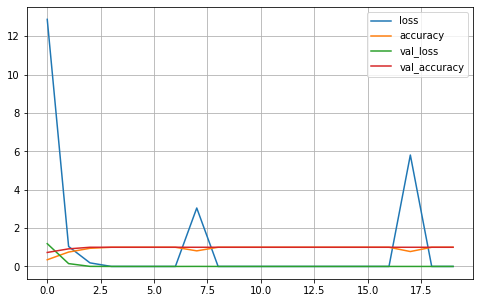

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


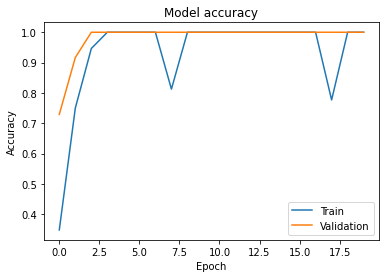

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=20,batch_size=4,validation_data=(x_test,y_test),verbose=1)
score = model.evaluate(x_test,y_test,verbose=0)
print("Error: ",score[0])
print("Accuracy: ",score[1])
model_json = model.to_json()
with open('drive/MyDrive/Model/Fruit_Recognition/fruit_recognition_config.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/Model/Fruit_Recognition/fruit_recognition_weights.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

In [ ]:
label = ['banana','tomato','lemon','orange','carambula','lychee','pear','avocado']

['banana', 'banana', 'tomato', 'banana', 'tomato', 'banana', 'banana', 'pear', 'tomato', 'pear']


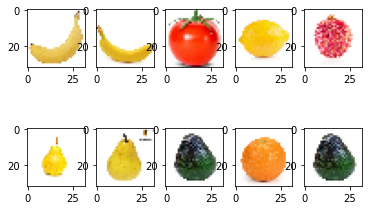

In [ ]:

from keras.preprocessing.image import load_img,img_to_array
pre = []
for i in range(10):
  url = 'drive/MyDrive/data_test/fruit_recognition/test'+str(i)+'.jpg'
  test = load_img(url,target_size=(32,32))
  plt.subplot(2,5,i+1)
  plt.imshow(test)
  test = img_to_array(test)
  test = test.reshape(1,32,32,3)
  test = test.astype('float32')
  test = test/255.0
  #pre.append(int(np.argmax(model.predict(test))))
  pre.append(label[int(np.argmax(model.predict(test)))])
print(pre)

pear


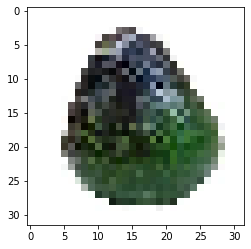

In [ ]:
url = 'drive/MyDrive/data_test/fruit_recognition/test'+str(7)+'.jpg'
test = load_img(url,target_size=(32,32))
plt.imshow(test)
test = img_to_array(test)
test = test.reshape(1,32,32,3)
test = test.astype('float32')
test = test/255.0
print(label[int(np.argmax(model.predict(test)))])